# Лабораторна робота №16

## Лінійна регресія

Для знаходження значень коефіцієнтів лінійної регресії з однією ознакою необхідно вирішити систему рівнянь: 

$$
 \begin{cases}
   \theta_0l + \theta_1\sum\limits_{i = 1}^{l} x_i = \sum\limits_{i = 1}^{l} y_i\\
   \theta_0\sum\limits_{i = 1}^{l} x_i + \theta_1\sum\limits_{i = 1}^{l} x^2_i = \sum\limits_{i = 1}^{l} x_iy_i\\
 \end{cases}
$$

Вирішивши цю систему отримаємо:

$$
\theta_1=\frac{\sum\limits_{i = 1}^{l} x_iy_i - \frac{\sum\limits_{i = 1}^{l} x_i\sum\limits_{i = 1}^{l} y_i}{l}}{\sum\limits_{i = 1}^{l} x^2_i - \frac{\sum\limits_{i = 1}^{l} x_i\sum\limits_{i = 1}^{l} x_i}{l}}
$$

$$
\theta_0=\frac{\sum\limits_{i = 1}^{l}y_i - \theta_1\sum\limits_{i = 1}^{l}x_i}{l}
$$


Тоді алгоритм набуває вигляду:

$$a(x)=\theta_0 + \theta_1x$$

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

%matplotlib inline

In [201]:
def load_data(input_file, delimiter = ','):
    data = np.loadtxt(input_file, delimiter=delimiter)
    X, y = data[:, :-1], data[:, -1]
    return X, y

In [202]:
X, y = load_data('../data/data_singlevar_regr.txt')
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [203]:
def compute_theta_1(x_train, y_train):
    m = x_train.shape[0]
    
    x = x_train[:, 0]
    y = y_train

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_xx = np.sum(x*x)

    return (sum_xy - sum_x * sum_y / m) / (sum_xx - sum_x * sum_x / m)

In [204]:
theta_1 = compute_theta_1(x_train, y_train)
print(theta_1)

0.6772803684244377


In [205]:
def compute_theta_0(x_train, y_train, theta_1):
    m = x_train.shape[0]
    
    x = x_train[:, 0]
    y = y_train

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    
    return (sum_y - theta_1 * sum_x) / m


In [206]:
theta_0 = compute_theta_0(x_train, y_train, theta_1)
print(theta_0)

4.090420181414748


Прогноз отриманий на тренувальних даних `y_predicted`

In [207]:
m = x_train.shape[0]
y_predicted = np.zeros(m)

for i in range(m):
    y_predicted[i] = theta_0 + theta_1 * x_train[i]

Прогноз отриманий на  даних для перевірки `y_test_predicted`

In [208]:
n = x_test.shape[0]
y_test_predicted = np.zeros(n)
for i in range(n):
    y_test_predicted[i] = theta_0 + theta_1 * x_test[i]

In [209]:
print("Метрики якості на тренувальному наборі:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_train, y_predicted), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_train, y_predicted), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_train, y_predicted), 2))
print("R2 score =", round(sm.r2_score(y_train, y_predicted), 2))

Метрики якості на тренувальному наборі:
Mean absolute error = 0.68
Mean squared error = 0.67
Median absolute error = 0.71
Explain variance score = 0.87
R2 score = 0.87


In [210]:
print("Метрики якості на наборі для перевірки:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_predicted), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_predicted), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_predicted), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_predicted), 2))

Метрики якості на наборі для перевірки:
Mean absolute error = 0.54
Mean squared error = 0.5
Median absolute error = 0.34
Explain variance score = 0.87
R2 score = 0.84


### Візуалізація отриманих результатів

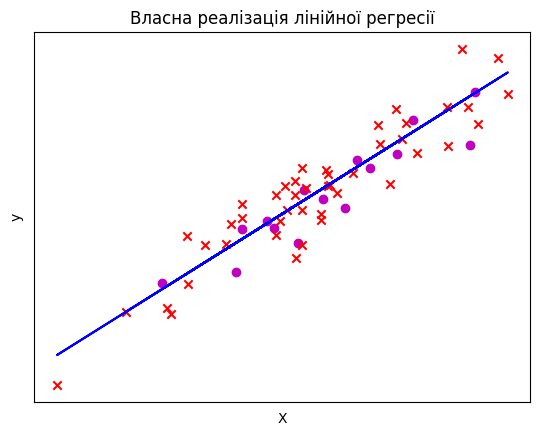

In [211]:
# Plot the linear fit
plt.plot(x_train, y_predicted, c = "b")

plt.scatter(x_test, y_test, color='m')
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.xticks(())
plt.yticks(())
plt.xlabel('X')
plt.ylabel('y')
plt.title('Власна реалізація лінійної регресії')

plt.show()

метрики якості для власної реалізації

In [212]:

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_predicted_lr = linear_regressor.predict(x_train)
y_test_predicted_lr = linear_regressor.predict(x_test)

In [213]:
print("Метрики якості на тренувальному наборі:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_predicted_lr), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_train, y_predicted_lr), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_train, y_predicted_lr), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_train, y_predicted_lr), 2))
print("R2 score =", round(sm.r2_score(y_train, y_predicted_lr), 2))

Метрики якості на тренувальному наборі:
Mean absolute error = 0.68
Mean squared error = 0.67
Median absolute error = 0.71
Explain variance score = 0.87
R2 score = 0.87


In [214]:
print("Метрики якості на наборі для перевірки:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_predicted_lr), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_predicted_lr), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_predicted_lr), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_predicted_lr), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_predicted_lr), 2))

Метрики якості на наборі для перевірки:
Mean absolute error = 0.54
Mean squared error = 0.5
Median absolute error = 0.34
Explain variance score = 0.87
R2 score = 0.84


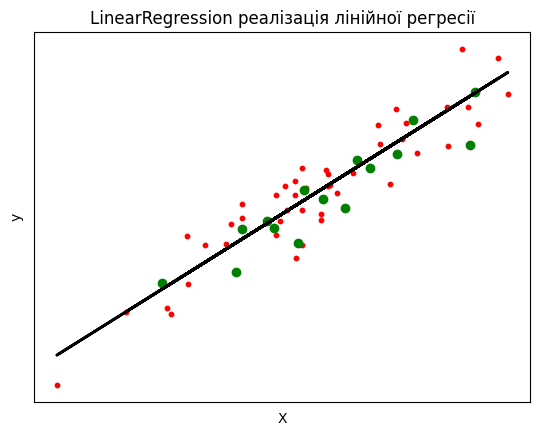

In [215]:
plt.scatter(x_train, y_train, color='r', s=10)
plt.scatter(x_test, y_test, color='g')

Y_pred = linear_regressor.predict(X)

plt.plot(X, Y_pred, color='k', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('X')
plt.ylabel('y')
plt.title('LinearRegression реалізація лінійної регресії')

plt.show()